         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

d:\PYTHON\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:17:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Vraj\AppData\Local\Temp\ipykernel_19764\2446658588.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette="viridis")  # Top 10


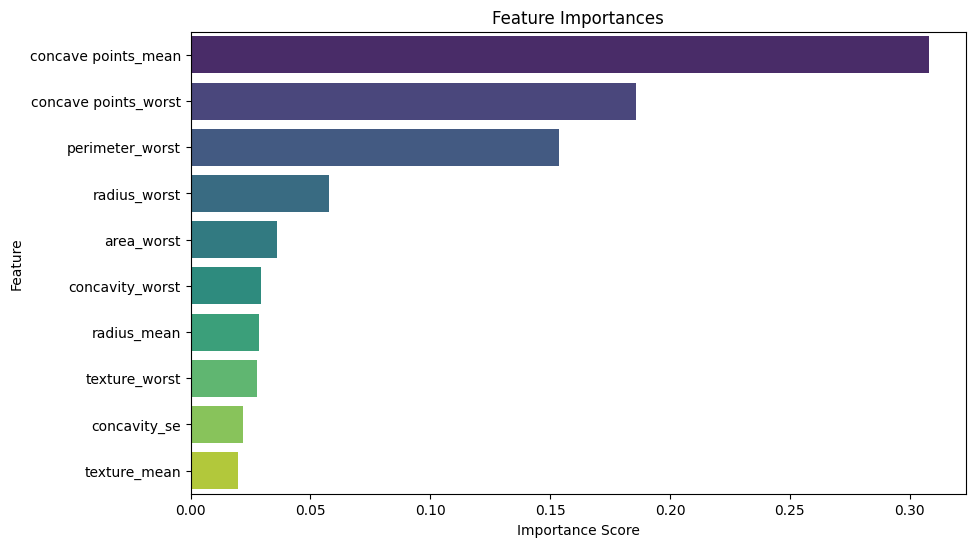

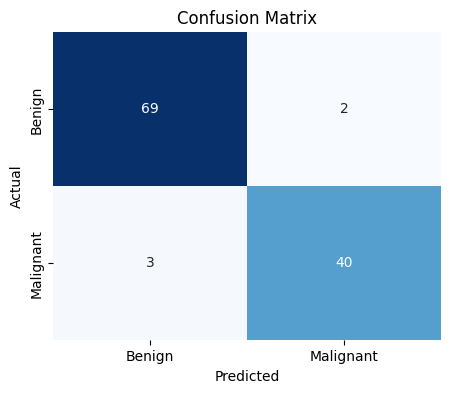

In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and inspect data
df = pd.read_csv('cancer.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 2. Clean & prepare data
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')  # Drop extra cols if present
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})        # Encode diagnosis

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build and train model
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, 
                      use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}\n")
print(classification_report(y_test, y_pred))

# 7. Feature Importance Plot
plt.figure(figsize=(10,6))
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.title('Feature Importances')
sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette="viridis")  # Top 10
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

